In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
mental = pd.read_csv('../Resources/mental.csv')
mental

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10696,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,3.5,47,"Jun 29 - Jul 11, 2022",06/29/2022,07/11/2022,31.9,27.4,36.7,27.4 - 36.7,30.4-33.1
10697,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,3.5,47,"Jun 29 - Jul 11, 2022",06/29/2022,07/11/2022,28.5,25.2,32.0,25.2 - 32.0,25.5-30.3
10698,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,3.5,47,"Jun 29 - Jul 11, 2022",06/29/2022,07/11/2022,37.5,30.8,44.6,30.8 - 44.6,37.1-43.5
10699,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3.5,47,"Jun 29 - Jul 11, 2022",06/29/2022,07/11/2022,27.6,22.7,32.8,22.7 - 32.8,25.5-30.3


In [ ]:
#mental_trimmed = mental.loc[(mental['Group'] == 'By Age') | (mental['Group'] == 'By State')].reset_index(drop=True)

In [3]:
# Confidence level by age group
group     = "By Education"
indicator = "Symptoms of Anxiety Disorder or Depressive Disorder"
by_education = mental.loc[   (mental["Group"]     == group)
                             & (mental["Indicator"] == indicator) 
                           , [ "Subgroup"
                             , "Value"
                             , "Time Period Start Date"]
                           ].reset_index(drop=True)

#print (f"len(by_age) before dropna: {len(by_age)}")
by_education = by_education.dropna()
subgroup_df = by_education.groupby(["Subgroup"])
by_subgroup = subgroup_df["Value"].mean()
by_education

,Subgroup,Value,Time Period Start Date
0,Less than a high school diploma,45.4,04/23/2020
1,High school diploma or GED,36.7,04/23/2020
2,Some college/Associate's degree,38.5,04/23/2020
3,Bachelor's degree or higher,30.7,04/23/2020
4,Less than a high school diploma,42.5,05/07/2020
...,...,...,...
211,Bachelor's degree or higher,25.6,06/01/2022
212,Less than a high school diploma,39.0,06/29/2022
213,High school diploma or GED,35.3,06/29/2022
214,Some college/Associate's degree,38.1,06/29/2022


In [5]:
by_education['Date'] = pd.to_datetime(by_education['Time Period Start Date'])
by_education = by_education.sort_values(by=['Date'])
by_education = by_education.astype({'Date':str})
by_education

,Subgroup,Value,Time Period Start Date,Date
0,Less than a high school diploma,45.4,04/23/2020,2020-04-23
1,High school diploma or GED,36.7,04/23/2020,2020-04-23
2,Some college/Associate's degree,38.5,04/23/2020,2020-04-23
3,Bachelor's degree or higher,30.7,04/23/2020,2020-04-23
4,Less than a high school diploma,42.5,05/07/2020,2020-05-07
...,...,...,...,...
211,Bachelor's degree or higher,25.6,06/01/2022,2022-06-01
212,Less than a high school diploma,39.0,06/29/2022,2022-06-29
213,High school diploma or GED,35.3,06/29/2022,2022-06-29
214,Some college/Associate's degree,38.1,06/29/2022,2022-06-29


In [6]:
subgroups = by_education['Subgroup'].unique()
subgroups

array(['Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher"],
      dtype=object)

In [7]:
# Create a line graph of Time Period vs average depression rate
def create_line_graph(time_period_mean_index, time_period_mean, outfile):
    
    x_axis = time_period_mean.index
    y_axis = time_period_mean
    figure(figsize = (18, 10), dpi = 80)
    plt.plot(x_axis, y_axis)

    # Set the title, x and y label
    plt.title(f'Depression percentage by Subgroup')
    plt.xlabel('Date')
    plt.ylabel('Average Depression Rate')
    plt.xticks(rotation = 45)
    plt.savefig(f"output_data/line_by_education{outfile}")
    plt.show()

subgroup: Less than a high school diploma


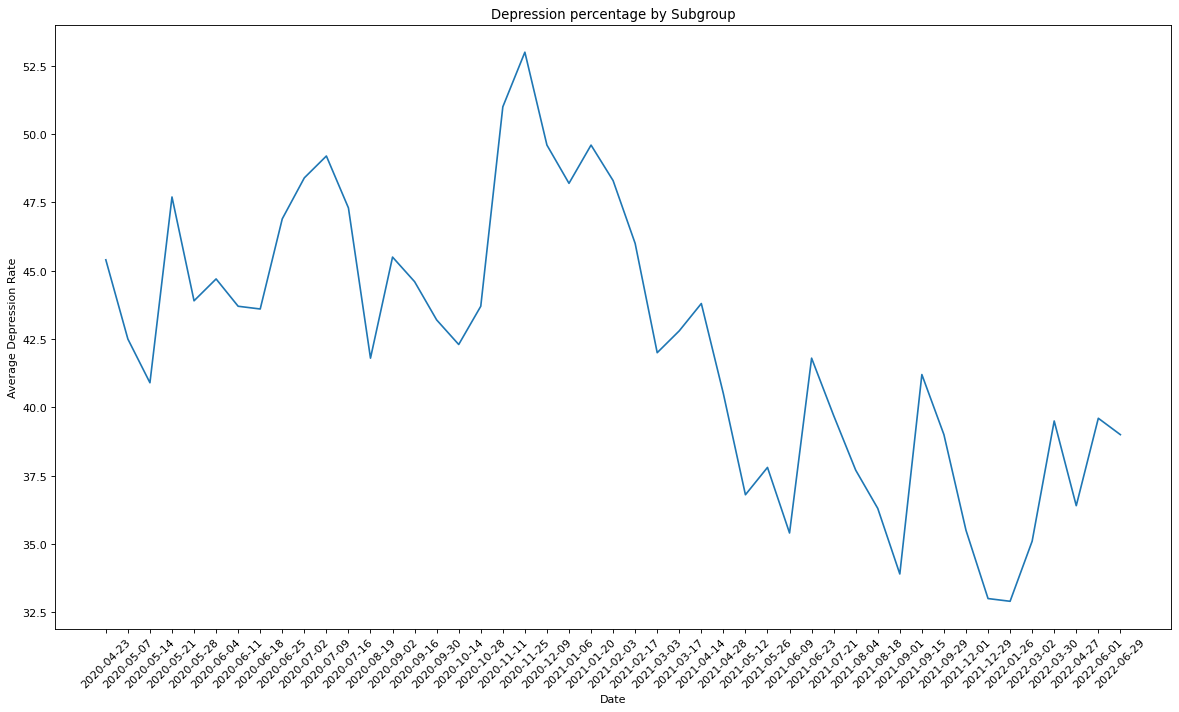

subgroup: High school diploma or GED


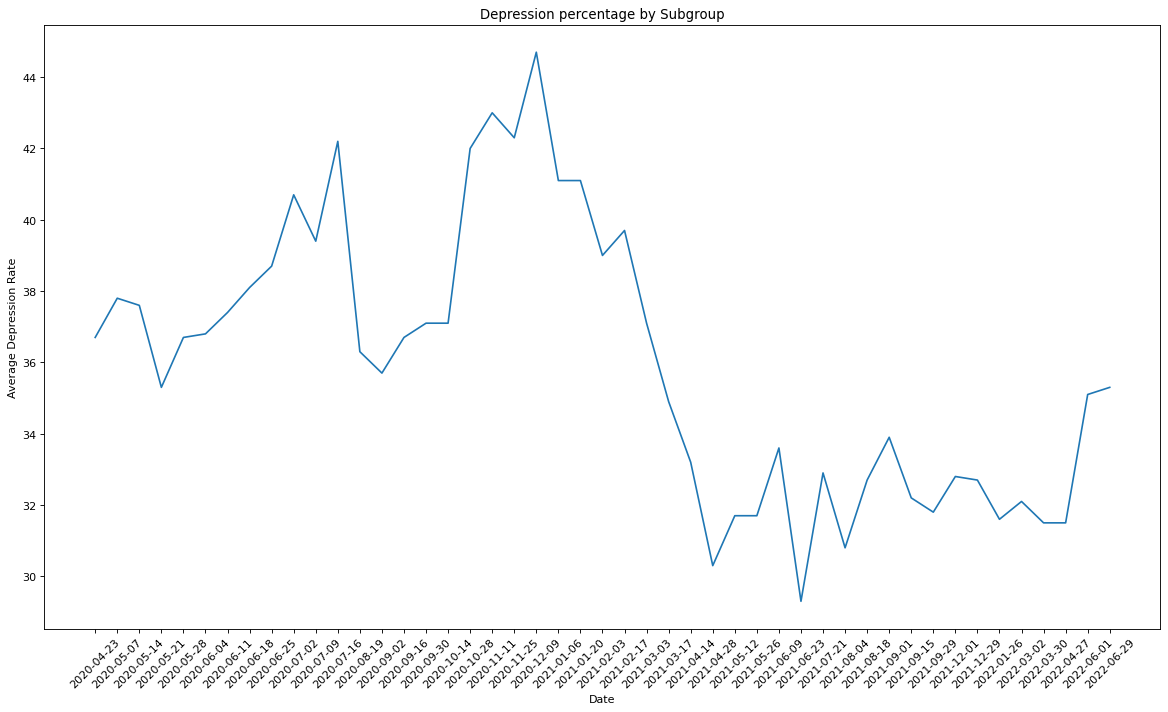

subgroup: Some college/Associate's degree


FileNotFoundError: [Errno 2] No such file or directory: "output_data/line_by_educationSome college/Associate's degree.png"

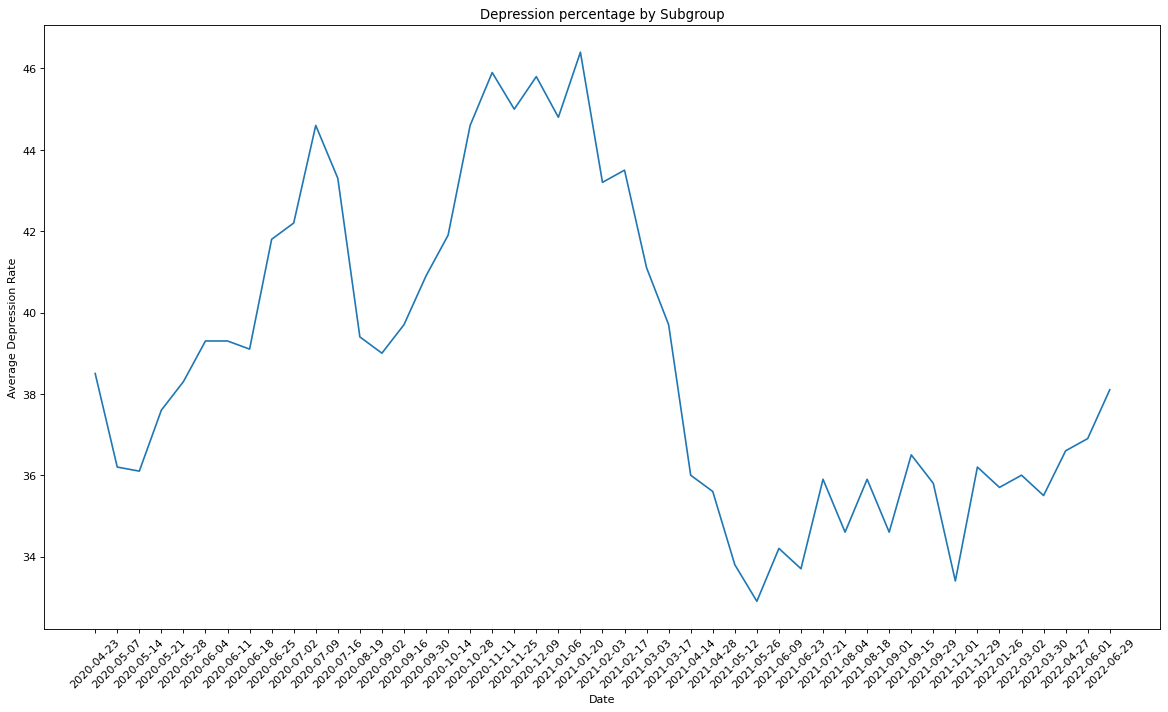

In [8]:
for subgroup in subgroups:
    print (f"subgroup: {subgroup}")
    subgroup_df = by_education.loc[by_education["Subgroup"] == subgroup]

    time_period      = subgroup_df.groupby (["Date"])
    time_period_mean = time_period ["Value"].mean()
    
    # Create a line graph of Time Period vs average depression rate
    create_line_graph(time_period_mean.index, time_period_mean, subgroup)

In [9]:
# Create a bar graph of Time Period vs average depression rate
def create_bar_graph(time_period_mean_df, outfile):
    
    chart_1 = time_period_mean_df.plot( kind      = "bar"
                              , facecolor = "blue"
                                          , figsize   = (18,10)
                                          , title     = "Depression percentage by Subgroup"
                                     #     , xlabel    = "Time Period Label"
                                          , xlabel    = "Date"
                                          , ylabel    = "Average depression rate"
                                          )

    # Set the ticklabels, Note: The total_timepoint.index has the list of Drug Regimen
    #xticklabels       = by_age.index
    xticklabels       = time_period_mean_df.index
    chart_1.set_xticklabels( xticklabels
                                   , rotation      = 45
                                   , rotation_mode = "anchor"
                                   , ha            = "right"
                                   , wrap          = True
                                   )
    plt.savefig(f"output_data/bar_by_education{outfile}")
    # Show plot
    plt.show()

subgroup: Less than a high school diploma


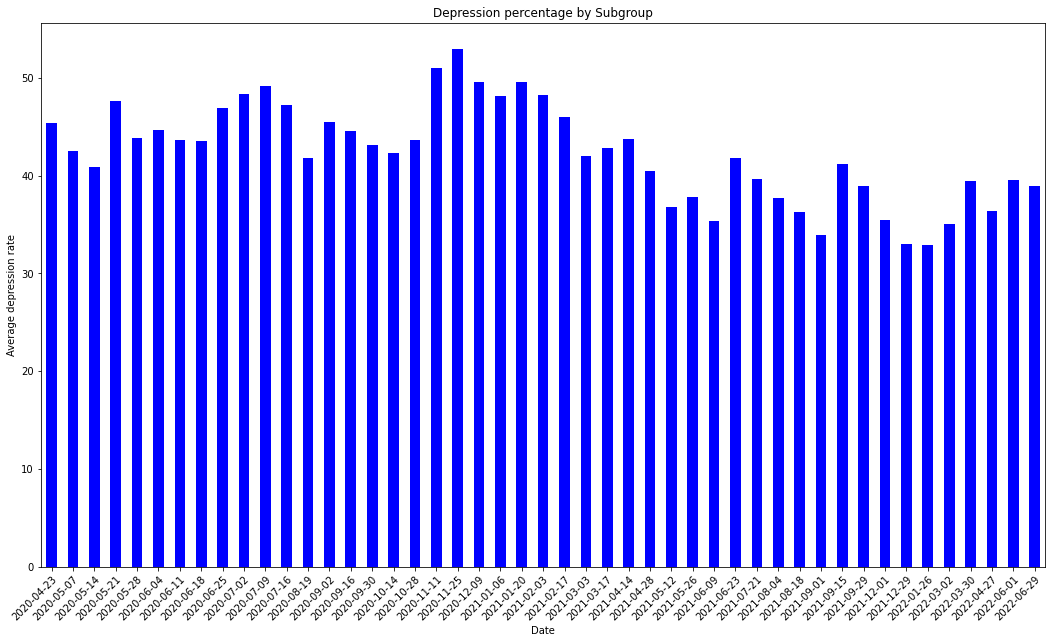

subgroup: High school diploma or GED


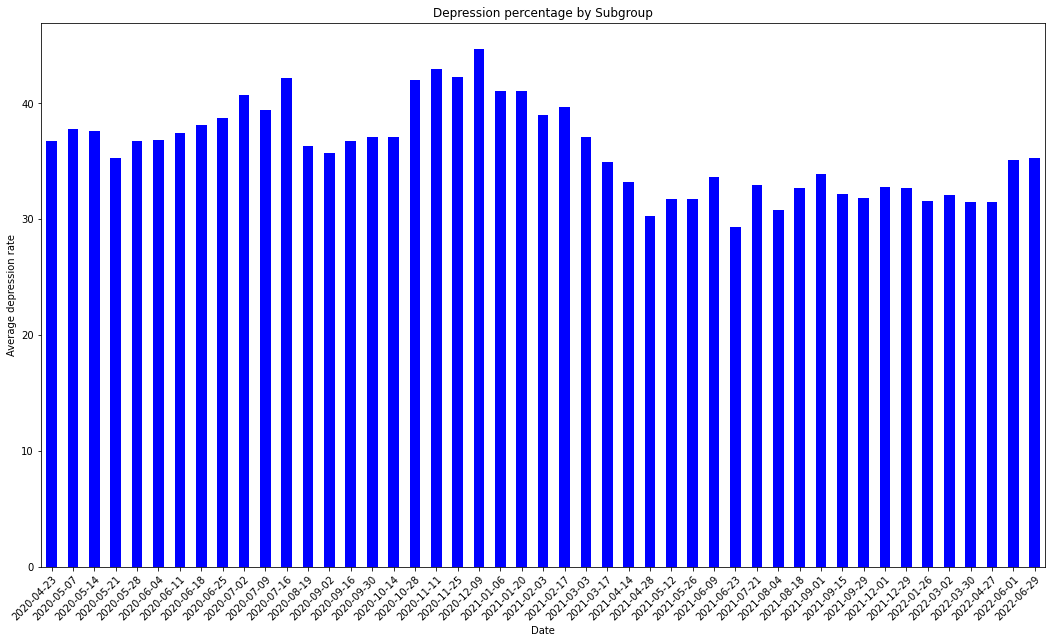

subgroup: Some college/Associate's degree


FileNotFoundError: [Errno 2] No such file or directory: "output_data/bar_by_educationSome college/Associate's degree.png"

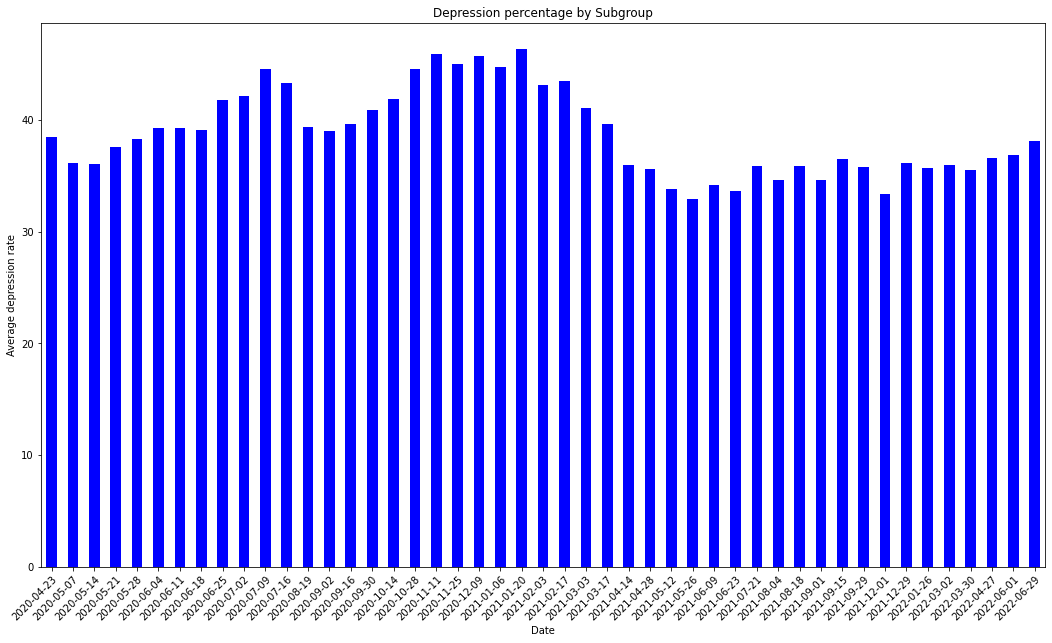

In [11]:
for subgroup in subgroups:
    print (f"subgroup: {subgroup}")
    subgroup_df = by_education.loc[by_education["Subgroup"] == subgroup]

    time_period      = subgroup_df.groupby (["Date"])
    time_period_mean = time_period ["Value"].mean()
    
    # Create a bar graph of Time Period vs average depression rate
    create_bar_graph(time_period_mean, subgroup)